In [19]:
%matplotlib ipympl

In [18]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('..')
from s2_helper import *

### Elevation raster

In [8]:
raster = os.path.dirname(os.getcwd()) + r"/data/eesti_clipped/small_extent/MeritDEM90m.tif"

In [9]:
s2_el_18 = raster_to_s2(raster, 'elevation', 14, 19, [26.521263, 58.283163, 26.900083, 58.505180], 2)

Raster pixel size 92.6624388709314
488.02310683696226
244.0187207510499
122.01115172745372
61.006023641009484
30.50351682108269
18
Start filling raster extent with s2 indexes at resolution 18
Start getting raster values for s2 cells at resolution 18


In [12]:
s2_el_18 = create_s2_geometry(s2_el_18)

In [13]:
s2_el_17 = cell_s2_downsampling(s2_el_18,'cell_id','elevation', 17, 'numeric')
s2_el_17 = create_s2_geometry(s2_el_17)

In [14]:
s2_el_16 = cell_s2_downsampling(s2_el_17,'cell_id','elevation', 16, 'numeric')
s2_el_16 = create_s2_geometry(s2_el_16)

In [15]:
s2_el_15 = cell_s2_downsampling(s2_el_16,'cell_id','elevation', 15, 'numeric')
s2_el_15 = create_s2_geometry(s2_el_15)

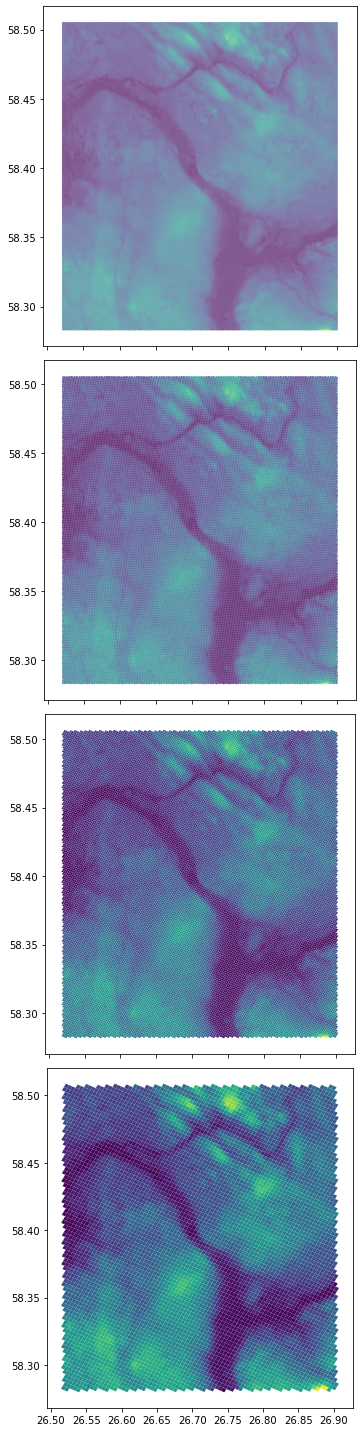

In [19]:
fig, ax = plt.subplots(4,1,figsize=(7,20),sharex='col')
s2_el_18.plot(column='elevation',ax=ax[0])
s2_el_17.plot(column='elevation',ax=ax[1])
s2_el_16.plot(column='elevation',ax=ax[2])
s2_el_15.plot(column='elevation',ax=ax[3])
plt.tight_layout()

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
s2_el_15.plot(column='elevation',ax=ax)
ax.set_title('s2 elevation')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Corine vector

In [20]:
vector = os.path.dirname(os.getcwd()) + r'\data\eesti_clipped\land_cover\CorineEestiWGS84.gpkg'

In [7]:
corine_legend = pd.read_pickle(os.path.dirname(os.getcwd()) + r'/data/eesti_clipped/land_cover/corine_legend.pkl')

In [22]:
s2_cor_18 = vector_to_s2(vector,'code_18',18,[26.521263, 58.283163, 26.900083, 58.505180])

Start filling raster extent with s2 indexes at resolution 18


In [23]:
s2_cor_18 = create_s2_geometry(s2_cor_18)

In [24]:
s2_cor_17 = cell_s2_downsampling(s2_cor_18,'cell_id','code_18', 17, 'categorical')
s2_cor_17 = create_s2_geometry(s2_cor_17)

In [25]:
s2_cor_16 = cell_s2_downsampling(s2_cor_17,'cell_id','code_18', 16, 'categorical')
s2_cor_16 = create_s2_geometry(s2_cor_16)

In [26]:
s2_cor_15 = cell_s2_downsampling(s2_cor_16,'cell_id','code_18', 15, 'categorical')
s2_cor_15 = create_s2_geometry(s2_cor_15)

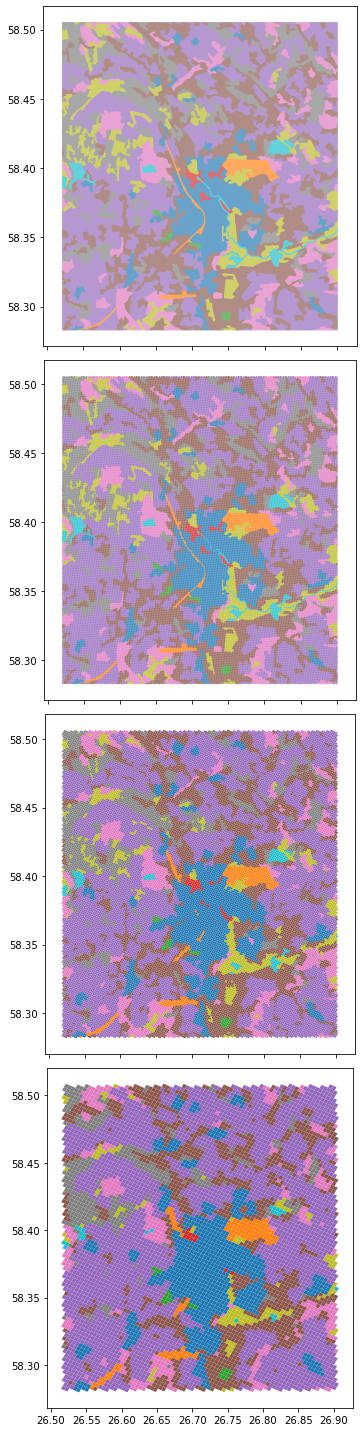

In [27]:
fig, ax = plt.subplots(4,1,figsize=(7,20),sharex='col')
s2_cor_18.plot(column='code_18',ax=ax[0])
s2_cor_17.plot(column='code_18',ax=ax[1])
s2_cor_16.plot(column='code_18',ax=ax[2])
s2_cor_15.plot(column='code_18',ax=ax[3])
plt.tight_layout()

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
for cor_class, data in s2_cor_16.groupby('code_18'):
    #print(cor_class)
    color = corine_legend[corine_legend['CLC_CODE']==int(cor_class)]['rgb_tuple'].values[0].tolist()
    data.plot(ax=ax,color=color)
ax.set_title('s2 landcover')
plt.show()
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
for cor_class, data in s2_cor_15.groupby('code_18'):
    #print(cor_class)
    color = corine_legend[corine_legend['CLC_CODE']==int(cor_class)]['rgb_tuple'].values[0].tolist()
    data.plot(ax=ax,color=color)
ax.set_title('s2 landcover')
plt.show()
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …